<a href="https://colab.research.google.com/github/liasmi/Salary_Prediction_ML/blob/main/ML_use_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import lib



In [2]:
import pandas as pd
# Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Linear model 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
salaries = pd.read_csv('salaries.csv')
salaries

,Gender,Age,Department,Department_code,Years_exp,Tenure (months),Gross
0,0,25,Tech,7,7.5,7,74922
1,1,26,Operations,3,8.0,6,44375
2,0,24,Operations,3,7.0,8,82263
3,0,26,Operations,3,8.0,6,44375
4,0,29,Engineering,0,9.5,25,235405
...,...,...,...,...,...,...,...
1797,0,29,Other,4,9.5,34,88934
1798,0,27,Engineering,0,8.5,33,133224
1799,0,29,Operations,3,9.5,15,72547
1800,0,47,Other,4,18.5,30,227176


In [4]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1802 entries, 0 to 1801
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           1802 non-null   int64  
 1   Age              1802 non-null   int64  
 2   Department       1802 non-null   object 
 3   Department_code  1802 non-null   int64  
 4   Years_exp        1802 non-null   float64
 5   Tenure (months)  1802 non-null   int64  
 6   Gross            1802 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 98.7+ KB


In [13]:
salaries.shape # to see how many rows, columns

(1802, 7)

In [14]:
salaries.dtypes # to see available columns and their data type

Gender               int64
Age                  int64
Department          object
Department_code      int64
Years_exp          float64
Tenure (months)      int64
Gross                int64
dtype: object

In [5]:
salaries.isnull().sum()

Gender             0
Age                0
Department         0
Department_code    0
Years_exp          0
Tenure (months)    0
Gross              0
dtype: int64

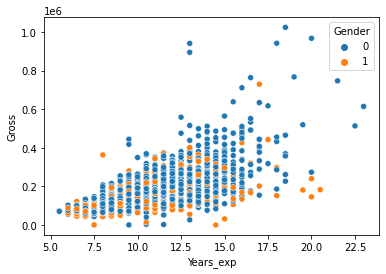

In [15]:
sns.scatterplot(data=salaries, x="Years_exp", y="Gross", hue="Gender")

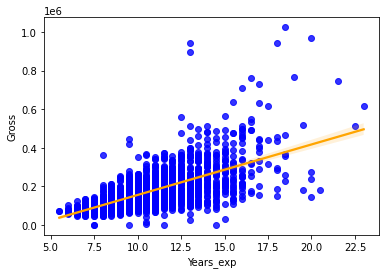

In [23]:
sns.regplot(x='Years_exp', y='Gross', data=salaries, color='b', line_kws={'color': 'orange'})

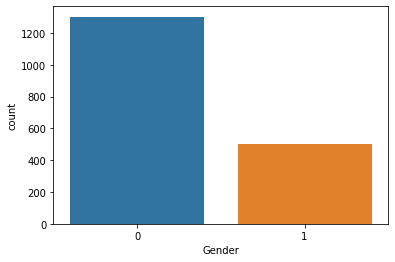

In [16]:
sns.countplot(data=salaries, x="Gender") # to see how many of each gender we have in the dataset

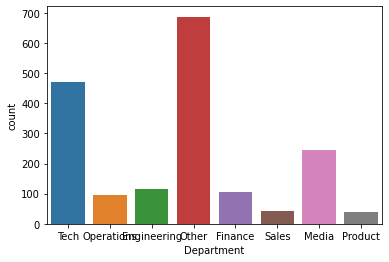

In [17]:
sns.countplot(data=salaries, x="Department") # to see how many of each department we have

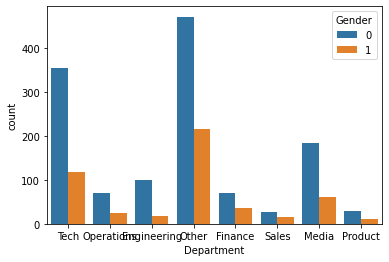

In [18]:
sns.countplot(data=salaries, x="Department", hue="Gender")

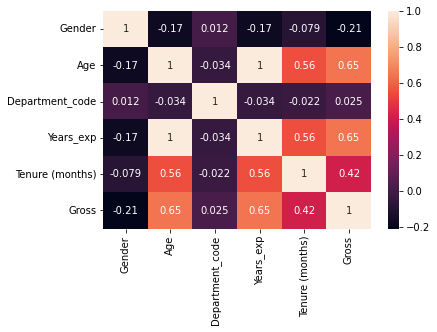

In [8]:
corrMatrix = salaries.corr()
sns.heatmap(corrMatrix, annot=True)

In [19]:
features = salaries.drop(["Gross", "Department"], axis="columns") # dropping the Department column because it's text
target = salaries["Gross"]

In [20]:
features.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,1802.0,0.276915,0.447598,0.0,0.0,0.0,1.0,1.0
Age,1802.0,31.516648,5.225084,21.0,28.0,31.0,35.0,56.0
Department_code,1802.0,4.093230,2.151448,0.0,2.0,4.0,7.0,7.0
Years_exp,1802.0,10.758324,2.612542,5.5,9.0,10.5,12.5,23.0
Tenure (months),1802.0,48.376804,35.639826,6.0,23.0,39.0,66.0,190.0


In [21]:
features

,Gender,Age,Department_code,Years_exp,Tenure (months)
0,0,25,7,7.5,7
1,1,26,3,8.0,6
2,0,24,3,7.0,8
3,0,26,3,8.0,6
4,0,29,0,9.5,25
...,...,...,...,...,...
1797,0,29,4,9.5,34
1798,0,27,0,8.5,33
1799,0,29,3,9.5,15
1800,0,47,4,18.5,30


In [24]:
model = LinearRegression()

In [25]:
model.fit(features, target)

LinearRegression()

In [26]:
model.score(features, target)

0.43754799942321343

In [27]:
# here's a freebie! You can change the numbers below to change the info of your hire ;)
hire = [[1, 29, 2, 5.2, 10]]
model.predict(hire)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([93673.0353124])

In [28]:
model.coef_

array([-24245.70669339,   9467.18023663,   2351.48450104,   4733.59011832,
          249.19491939])

In [29]:
pd.concat([pd.DataFrame(features.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)

,0,0
0,Gender,-24245.706693
1,Age,9467.180237
2,Department_code,2351.484501
3,Years_exp,4733.590118
4,Tenure (months),249.194919


In [30]:
model.intercept_

-188439.07166781544

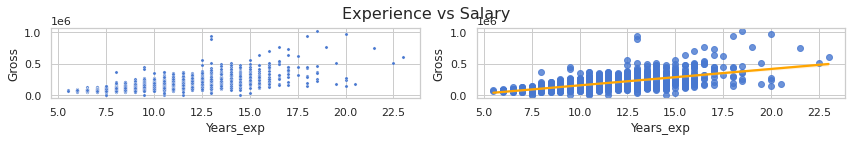

In [ ]:
sns.set(style='whitegrid', palette='muted')

fig, axes = plt.subplots(1,2, figsize=(12,2))

sns.scatterplot(x='Years_exp', y='Gross', data=features, color='b', s=10, ax=axes[0])
sns.regplot(x='Years_exp', y='Gross', data=features, color='b', line_kws={'color': 'orange'}, ax=axes[1])

fig.suptitle('Experience vs Salary', fontsize=16)
plt.tight_layout()
plt.show()

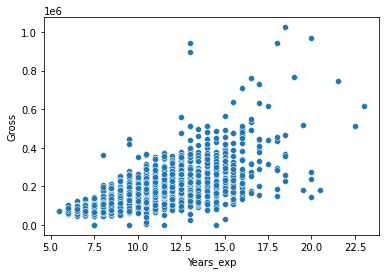

In [11]:
sns.scatterplot(data=features, x="Years_exp", y="Gross")

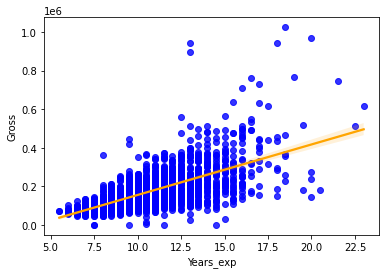

In [12]:
sns.regplot(x='Years_exp', y='Gross', data=features, color='b', line_kws={'color': 'orange'})

In [ ]:
salaries.drop(columns=["Tenure (months)"],inplace=True)
salaries

,Age,Years_exp
0,25,7.5
1,26,8.0
2,24,7.0
3,26,8.0
4,29,9.5
...,...,...
1797,29,9.5
1798,27,8.5
1799,29,9.5
1800,47,18.5


In [ ]:
X = salaries.iloc[:].values
y = features.iloc[:].values

# Split the data into 70-30 volume
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)


array([[ 74922],
       [ 44375],
       [ 82263],
       ...,
       [ 72547],
       [227176],
       [114641]])

In [ ]:
print(f"Shape of Train X :{X_train.shape}, Y: {y_train.shape}, Test X: {X_test.shape} Y: {y_test.shape}")

Shape of Train X :(1201, 2), Y: (1201, 1), Test X: (601, 2) Y: (601, 1)


In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_preds = regressor.predict(X_test)

In [ ]:
print("Prediction accuracy: \n r2 score = {:.2f}".format(r2_score(y_test, y_preds)))
print("Mean Squared Error: \n MSE = {:.2f}".format(mean_squared_error(y_test, y_preds)))

Prediction accuracy: 
 r2 score = 0.39
Mean Squared Error: 
 MSE = 7252381604.66


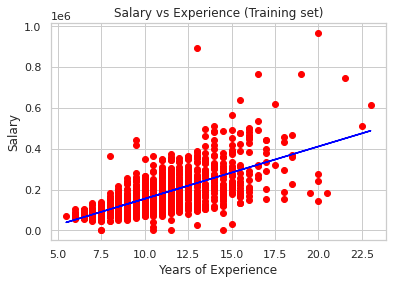

In [ ]:
# plot the actual data points of training set
plt.scatter(X_train, y_train, color = 'red')
# plot the regression line
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

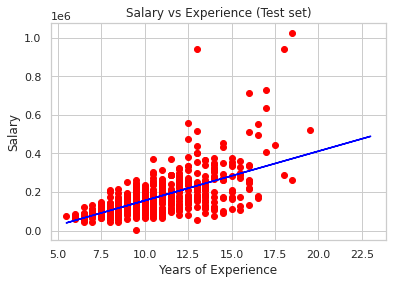

In [ ]:
# plot the actual data points of test set
plt.scatter(X_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Nouvelle section